In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.datasets import load_iris
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [14]:
# loading the IRIS dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

In [33]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [51]:
df['target'].unique()

array([0, 1, 2])

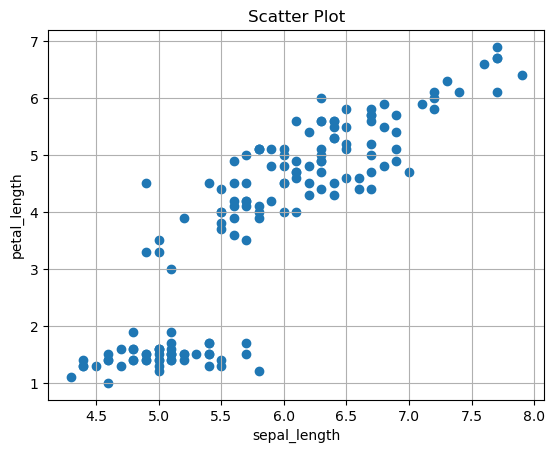

In [45]:
# plotting with python 
plt.scatter(df['sepal length (cm)'],df['petal length (cm)'])
# adding the aesthectics 
plt.title('Scatter Plot')
plt.xlabel('sepal_length')
plt.ylabel('petal_length')
plt.grid()

#Show the plot
plt.show()


Text(0, 0.5, 'petal_length')

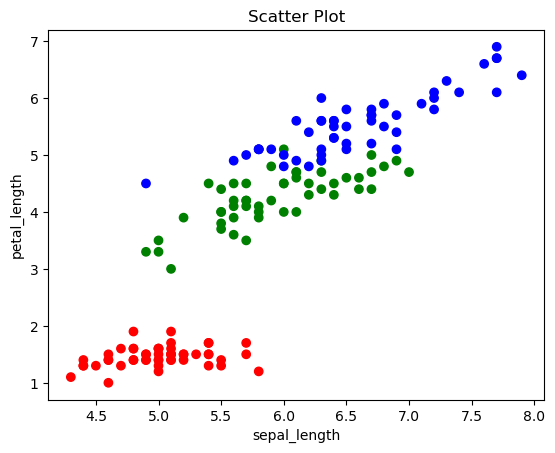

In [53]:
#Coloring the plot based on the type of species  
colors = {0:'r', 1:'g', 2:'b'}
plt.scatter(df['sepal length (cm)'],df['petal length (cm)'],c=df['target'].map(colors))

# adding the aesthectics 
plt.title('Scatter Plot')
plt.xlabel('sepal_length')
plt.ylabel('petal_length')


In [15]:
X = df['sepal length (cm)'].values.reshape(150,1)
y = df['target'].values.reshape(150,1)

In [56]:
y.shape

(150, 1)

In [57]:
# Split the data into training/testing sets (80:20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state= 101)

In [58]:
# Create a linear regression object
reg_model = linear_model.LinearRegression()


In [59]:
#model training
reg_model.fit(X_train, y_train)

# predictions using the trained model
y_pred = reg_model.predict(X_test)

# model evaluation
print("Mean squared error of the model is : {MSE:.2f}" .format(MSE= mean_squared_error(y_test, y_pred)))
print("Coefficient of determination (R-squared) is:{r2}".format (r2=r2_score(y_test, y_pred)))

Mean squared error of the model is : 0.28
Coefficient of determination (R-squared) is:0.5378922200747678


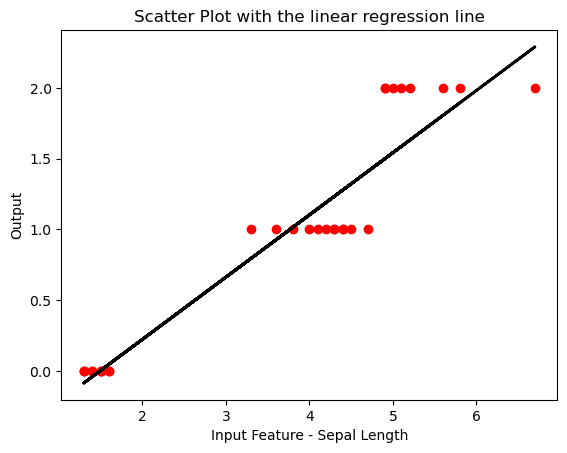

In [48]:
# Plot outputs
plt.scatter(X_test, y_test, color="red")
plt.plot(X_test, y_pred, color="black", linewidth=2)
plt.title('Scatter Plot with the linear regression line')
plt.xlabel('Input Feature - Sepal Length')
plt.ylabel('Output')
plt.show()


### Using a different feature 

In [39]:
X_new = df['petal length (cm)'].values.reshape(150,1)
y = df['target'].values.reshape(150,1)

In [40]:
# Split the data into training/testing sets (80:20 split)
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size= 0.20, random_state= 101)

In [41]:
# Create a linear regression object
reg_model = linear_model.LinearRegression()


In [42]:
#model training
reg_model.fit(X_train, y_train)

# predictions using the trained model
y_pred = reg_model.predict(X_test)

# model evaluation
print("Mean squared error of the model is : {MSE:.2f}" .format(MSE= mean_squared_error(y_test, y_pred)))
print("Coefficient of determination (R-squared) is:{r2}".format (r2=r2_score(y_test, y_pred)))

Mean squared error of the model is : 0.06
Coefficient of determination (R-squared) is:0.897221494702596


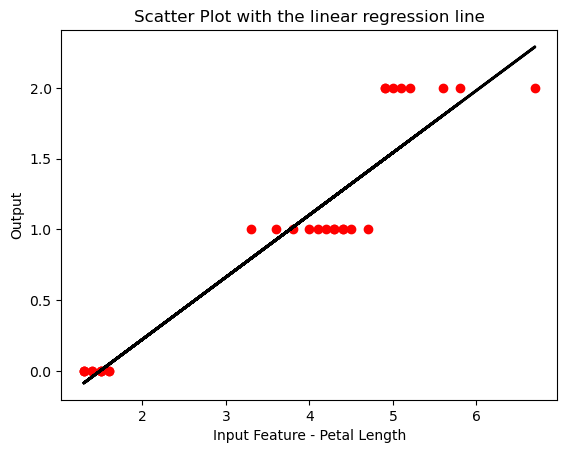

In [47]:
# Plot outputs
plt.scatter(X_test, y_test, color="red")
plt.plot(X_test, y_pred, color="black", linewidth=2)
plt.title('Scatter Plot with the linear regression line')
plt.xlabel('Input Feature - Petal Length')
plt.ylabel('Output')
plt.show()

### Polynomial Regression

In [57]:

# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures

In [58]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [59]:
# Split the data into training/testing sets (80:20 split)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size= 0.20, random_state= 101)

In [64]:
reg_model = linear_model.LinearRegression()

In [68]:
#model training
reg_model.fit(X_train, y_train)

# predictions using the trained model
y_pred = reg_model.predict(X_test)

# model evaluation
print("Mean squared error of the model is : {MSE:.2f}" .format(MSE= mean_squared_error(y_test, y_pred)))
print("Coefficient of determination (R-squared) is:{r2}".format (r2=r2_score(y_test, y_pred)))

Mean squared error of the model is : 0.06
Coefficient of determination (R-squared) is:0.8973343435957409


In [66]:
X_poly.shape

(150, 2)

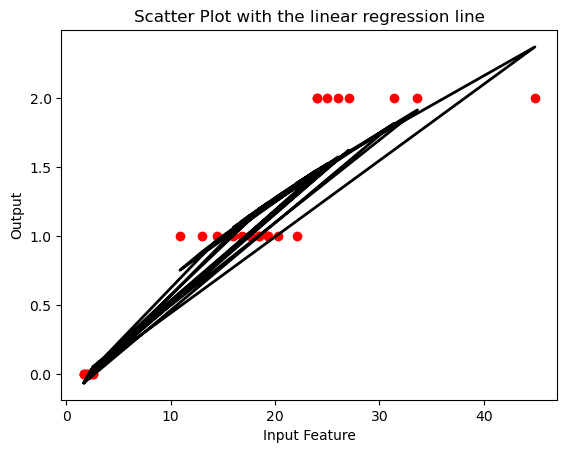

In [67]:
# Plot outputs
plt.scatter(X_test[:,1:2], y_test, color="red")
plt.plot(X_test[:,1:2], y_pred, color="black", linewidth=2)
plt.title('Scatter Plot with the linear regression line')
plt.xlabel('Input Feature')
plt.ylabel('Output')
plt.show()

#### One-Hot Encoding in Python

In [69]:
df_cat = pd.DataFrame({'Teams': ['A', 'A', 'B', 'B', 'B', 'B', 'C', 'C'],
                   'points': [25, 12, 15, 14, 19, 23, 25, 29]})


In [77]:
from sklearn.preprocessing import OneHotEncoder 
encoder = OneHotEncoder(sparse_output=False) 
encoded_df = encoder.fit_transform(df_cat['Teams'].values.reshape(-1,1))
encoded_df

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.]])